# Predicting Survivors of the Titanic

## Setup the demo environment

This should all be hidden. We have a small number of external dependencies that may need to be installed into your local conda environment (you are using conda to isolate your environments, right?)

* PROSE (program synthesis) which we download from a private pip channel
* seaborn 

In [1]:
print("TES")

TES


This function will load the training and test datasets into pandas dataframes. Ostensibly this function will bind to an Apach Arrow Plasma named object, but in this demo, they will just read the data in from CSV files on disk.

In [2]:
import pandas as pd

def attach_plasma_object(name):
    if name == "training":
        return pd.read_csv("data/train.csv")
    else:
        return pd.read_csv("data/test.csv")

In [1]:
SELECT TOP(5) PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
FROM survivors
WHERE DataSet = "train"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S


The second cell will do nothing, but this is the code that will inject the training and testing datasets into 

This is where we will insert the simulated SQL kernel cell. The code could look like this:

In [ ]:
@training =
    SELECT PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
    FROM survivors
    WHERE DataSet = "train"
    
@testing = 
    SELECT PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
    FROM survivors
    WHERE DataSet = "testing"

OUTPUT @training 
TO @train_df

OUTPUT @testing
TO @testing_df

## Inspect the same data from Python

Let's bind to the Apache Arrow Plasma objects that were created by the SQL kernel:

TODO: John needs to tighten and simplify how much code he's going to actually type in this section.

In [3]:
train_df = attach_plasma_object("training")
test_df = attach_plasma_object("testing")

Load all the libraries that we're planning to use. 

In [4]:
# data analysis and wrangling
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings to simplify output
import warnings
warnings.filterwarnings('ignore')

Preview the data:

* Categorical: Survived, Sex, Embarked
* Ordinal: Pclass
* Continuous: Age, Fare
* Discrete: SibSp, Parch

In [5]:
train_df.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's examine the statistical distribution of data in the numerical features:

In [6]:
train_df.describe()





,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyze by visualizing data

"Women and children first". Let's see how this shows up in the data. Let's look at survival histograms binned by age:

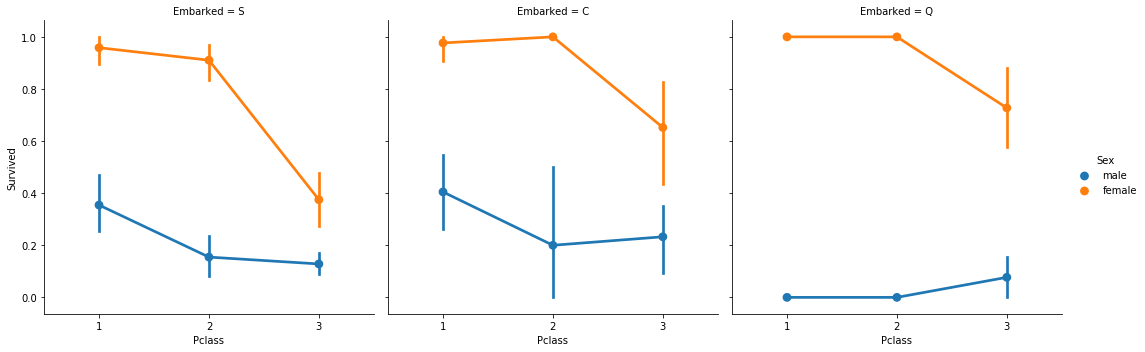

In [6]:
sns.catplot(x='Pclass',col='Embarked',y='Survived',hue='Sex',data=train_df,kind='point')

We can see that females survived at rates significantly greater than males, regardless of port.

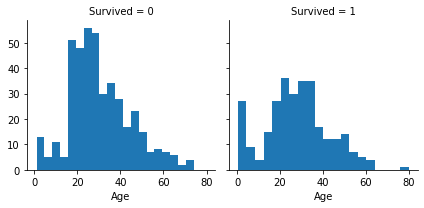

In [7]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

We can see that children (Age <= 4) had a high survival rate.

However, when we look at the data, we can see that Age has a significant number of missing values. Examine null vs. non-null for the train and the test datasets. Rank from the most missing to the least for train and test datasets:

I wonder if we can use the formal titles in the names to infer age?

## PROSE

Looks promising! But how do we extract the titles from the names? Let's ask a friend!

Section where we generate a derived column using PROSE. The code here will be typed in by my co-worker. 

TODO: John to tighten up what actually gets typed into this section so that it fits in a single cell, as well as figure out the banter between him and the co-worker.

# BUGBUG

Currently, I need to read the data in from a file vs. being able to use the existing training_df from earlier. I'm going to fake this for now using a "cxtransform" function (vs. a fictitious "cx.transform") to transform the existing dataframe into one that works with PROSE (I don't currently understand how the PROSE dataframe is different from a regular pandas dataframe).

In [7]:
import prose.codeaccelerator as cx
print('test')


.,.f,.saf

test


In [7]:
b2 = cxlab.DeriveValueBuilder(df[0:20])
b2.examples[df.loc[0]] = "Mr."
b2.examples[df.loc[1]] = "Mrs."
r2 = b2.learn()
r2

DeriveValueLearnResult
----
code
----

def derive_value_program(_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10, _11):
    index1 = _3.index(",") + 1
    other_parts = (_3.split(" ", 2))[:-1]
    len_left_substr = len(" ".join(other_parts))
    return _3[index1:len_left_substr].strip()





------------
preview_data
------------
  PassengerId Survived Pclass  \
0           1        0      3   
1           2        1      1   
2           3        1      3   
3           4        1      1   
4           5        0      3   

                                                Name     Sex Age SibSp Parch  \
0                            Braund, Mr. Owen Harris    male  22     1     0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38     1     0   
2                             Heikkinen, Miss. Laina  female  26     0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35     1     0   
4                           Allen, Mr. William Henry    male  35     0    

Prose is uncertain about Row 18 (see suggested_examples above). We provide a third example, and re-learn the program.

In [15]:
b2.examples[df.loc[18]] = "Mrs."
r2 = b2.learn()
r2

DeriveValueLearnResult
----
code
----
import regex

def derive_value_program(_0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10, _11):
    index1 = regex.search(r"\p{Zs}*,\p{Zs}*", _3).end()
    pattern_match = regex.search(r"\p{Zs}*\ \p{Zs}*", _3[index1:])
    index2 = index1 + pattern_match.start()
    return _3[index1:index2]





------------
preview_data
------------
  PassengerId Survived Pclass  \
0           1        0      3   
1           2        1      1   
2           3        1      3   
3           4        1      1   
4           5        0      3   

                                                Name     Sex Age SibSp Parch  \
0                            Braund, Mr. Owen Harris    male  22     1     0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38     1     0   
2                             Heikkinen, Miss. Laina  female  26     0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35     1     0   
4                           Allen

We can now use the synthesized program to populate all cells of the new column. To make the demo shorter, one can give the three examples upfront. The longer demo just illustrates one other aspect of Prose -- the ability to guide the user to rows that may be "problematic".


In [16]:
df['Title'] = [r2.code()(*row) for i, row in df.iterrows()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,Mr.
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.


Now we have a new column named "Title". Let us re-do the process to create a new column "IsChild", which should have a value "yes" if the passenger was a child, and "no" otherwise. This time we tell prose to just look at the "Title" column when looking for the logic to create the "IsChild" column. We provide 4 examples upfront.

In [17]:
b3 = cxlab.DeriveValueBuilder(df["Title"])
b3.examples["Mr."] = "no"
b3.examples["Mrs."] = "no"
b3.examples["Master."] = "yes"
b3.examples["Miss."] = "yes"
r3 = b3.learn()
r3

DeriveValueLearnResult
----
code
----

def derive_value_program(_0):
    return { "Mr.": "no", "Mrs.": "no", "Master.": "yes", "Miss.": "yes" }.get(_0)





------------
preview_data
------------
   Title output
0    Mr.     no
1   Mrs.     no
2  Miss.    yes
3   Mrs.     no
4    Mr.     no

------------------
suggested_examples
------------------
'Don.' -> []
'Rev.' -> []
'Dr.' -> []
'Mme.' -> []
'Ms.' -> []
'Major.' -> []
'Lady.' -> []
'Sir.' -> []
'Mlle.' -> []
'Col.' -> []
'Capt.' -> []
'the' -> []
'Jonkheer.' -> []

The suggested_examples above shows all the "problematic" values. We want to map all these values to "no". This is easily done by minimally modifying the code generated by Prose. So, we copy-paste the code, and edit it for our purpose as follows.

In [18]:
def derive_value_program(_0):
    return { "Mr.": "no", "Mrs.": "no", "Master.": "yes", "Miss.": "yes" }.get(_0, "no")

df["IsChild"] = [derive_value_program(row['Title']) for i, row in df.iterrows()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,Mr.,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,Miss.,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,Mrs.,no
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,Mr.,no
5,6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,Mr.,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S,Master.,yes
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,Mrs.,no
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,Mrs.,no


## Machine learning stuff

This section will be where we use the snippet to generate some code that will use AML AutoML to train a model using `df`. We likely won't run it in the interests of time, but this code snippet should actually work. TODO: making the code snippet actually work. The code will (not tested at all, but will do that next) should look something like this (taken from [AutoML docs](https://docs.microsoft.com/en-us/azure/machine-learning/service/tutorial-auto-train-models)):

In [ ]:
import logging
from azureml.core.experiment import Experiment
from azureml.train.automl import AutoMLConfig

automl_settings = {
    "iteration_timeout_minutes": 2,
    "iterations": 20,
    "primary_metric": 'spearman_correlation',
    "preprocess": True,
    "verbosity": logging.INFO,
    "n_cross_validations": 5
}

automl_config = AutoMLConfig(task='regression',
                             debug_log='automated_ml_errors.log',
                             X=x_train.values,
                             y=y_train.values.flatten(),
                             **automl_settings)
                             
experiment = Experiment(ws, "taxi-experiment")
local_run = experiment.submit(automl_config, show_output=True)







## Gather

Let's remove the exploratory code from this notebook, by keeping only the code that generated the final `df` above.

## Let's check the notebook into git

At this point, we will use the dummy git checkin UX to check in this notebook. We will then switch to another tab to see a diff between the checked-in notebook and the previous "version" of the notebook (essentially everything from the "Get the data from SQL" section to the end).

In [ ]:
import logging
from azureml.core.experiment import Experiment
from azureml.train.automl import AutoMLConfig

automl_settings = {
    "iteration_timeout_minutes": 2,
    "iterations": 20,
    "primary_metric": 'spearman_correlation',
    "preprocess": True,
    "verbosity": logging.INFO,
    "n_cross_validations": 5
}

automl_config = AutoMLConfig(task='regression',
                             debug_log='automated_ml_errors.log',
                             X=x_train.values,
                             y=y_train.values.flatten(),
                             **automl_settings)
                             
experiment = Experiment(ws, "taxi-experiment")
local_run = experiment.submit(automl_config, show_output=True)
